# SanFrancisco Salary dataset exploration

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
pd.options.display.max_columns = None

## Load the data into dataframe

In [3]:
df = pd.read_csv('../Dataset/SanFranSalary.csv')
df.head()

/home/user/miniconda3/envs/ml_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.shape

(148654, 13)

In [5]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


## EDA

In [7]:
df.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109900
OvertimePay          66555
OtherPay             84968
Benefits             99635
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64

In [8]:
# Check null values
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [9]:
# Remove 'Id' as it is unique for each row
# Remove 'Notes' as it is misisng for each row
df.drop(['Id', 'Notes'], axis=1, inplace=True)

In [10]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN


In [11]:
df['Status'].value_counts()

FT    22334
PT    15785
Name: Status, dtype: int64

In [12]:
# Let's fill 'None' for missing values in Status column
df['Status'] = df['Status'].fillna('None')
df['Status'].value_counts()

None    110535
FT       22334
PT       15785
Name: Status, dtype: int64

In [13]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
Status                  0
dtype: int64

In [14]:
df.loc[df['BasePay'].isnull()].head(20)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
81391,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.0,149934.11,149934.11,2013,San Francisco,None
84506,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.0,110485.41,131264.41,2013,San Francisco,None
84960,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.0,8841.48,120000.00,128841.48,2013,San Francisco,None
90525,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.0,106079.31,106079.31,2013,San Francisco,None
90786,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,San Francisco,None
90811,Edward M Harrington,Executive Contract Employee,NaN,0.0,105105.0,0.0,105105.00,105105.00,2013,San Francisco,None
91203,Spencer J Gregory,Inspector 3,NaN,0.0,103727.48,0.0,103727.48,103727.48,2013,San Francisco,None
92260,Derek Kerr,Senior Physician Specialist,NaN,0.0,100000.0,0.0,100000.00,100000.00,2013,San Francisco,None
97418,Kevin M Martin,Police Officer 3,NaN,0.0,80687.72,0.0,80687.72,80687.72,2013,San Francisco,None
98573,James M Blake,"Battalion Chief, Fire Suppress",NaN,0.0,74562.89,0.0,74562.89,74562.89,2013,San Francisco,None


We can replace 0 (zero) for null values in BasePay as the TotalPay is sum of BasePay, OvertimePay, OtherPay.

In [15]:
df['BasePay'] = df['BasePay'].fillna(0.0)
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
Status                  0
dtype: int64

In [16]:
df.loc[df['Benefits'].isnull()].head(20)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,None
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,None
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,None
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,None
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,None
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,San Francisco,None
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,San Francisco,None
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,San Francisco,None
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,San Francisco,None
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,San Francisco,None


We can replace 0 (zero) for null values in Benefits as the TotalPayBenefits is the sum of Benefits and TotalPay.

In [17]:
df['Benefits'] = df['Benefits'].fillna(0.0)
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype: int64

There are no missing values now.

In [18]:
df.duplicated().sum()

3

In [19]:
df.loc[df.duplicated()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco,None
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco,None
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco,None


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148651 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148651 non-null  object 
 1   JobTitle          148651 non-null  object 
 2   BasePay           148651 non-null  object 
 3   OvertimePay       148651 non-null  object 
 4   OtherPay          148651 non-null  object 
 5   Benefits          148651 non-null  object 
 6   TotalPay          148651 non-null  float64
 7   TotalPayBenefits  148651 non-null  float64
 8   Year              148651 non-null  int64  
 9   Agency            148651 non-null  object 
 10  Status            148651 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 13.6+ MB


In [23]:
df['BasePay'].value_counts()

0.0             1480
0.00             423
54703.00         327
55026.0          297
48472.4          210
                ... 
68032.05           1
71342.57           1
75459.88           1
55768.91           1
Not Provided       1
Name: BasePay, Length: 109900, dtype: int64

In [24]:
df['BasePay'] = df['BasePay'].replace('Not Provided', 0.0).astype('float64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148651 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148651 non-null  object 
 1   JobTitle          148651 non-null  object 
 2   BasePay           148651 non-null  float64
 3   OvertimePay       148651 non-null  object 
 4   OtherPay          148651 non-null  object 
 5   Benefits          148651 non-null  object 
 6   TotalPay          148651 non-null  float64
 7   TotalPayBenefits  148651 non-null  float64
 8   Year              148651 non-null  int64  
 9   Agency            148651 non-null  object 
 10  Status            148651 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 13.6+ MB


In [26]:
df['OvertimePay'] = df['OvertimePay'].replace('Not Provided', 0.0).astype('float64')
df['OtherPay'] = df['OtherPay'].replace('Not Provided', 0.0).astype('float64')
df['Benefits'] = df['Benefits'].replace('Not Provided', 0.0).astype('float64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148651 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148651 non-null  object 
 1   JobTitle          148651 non-null  object 
 2   BasePay           148651 non-null  float64
 3   OvertimePay       148651 non-null  float64
 4   OtherPay          148651 non-null  float64
 5   Benefits          148651 non-null  float64
 6   TotalPay          148651 non-null  float64
 7   TotalPayBenefits  148651 non-null  float64
 8   Year              148651 non-null  int64  
 9   Agency            148651 non-null  object 
 10  Status            148651 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 13.6+ MB


In [28]:
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype: int64

In [29]:
df['Age'] = datetime.datetime.now().year - df['Year']


In [30]:
df.drop('Year', axis=1, inplace=True)

In [31]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Agency,Status,Age
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,San Francisco,None,11
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,San Francisco,None,11
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,San Francisco,None,11
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,San Francisco,None,11
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,San Francisco,None,11


In [32]:
df.nunique()

EmployeeName        110811
JobTitle              2159
BasePay             109489
OvertimePay          65998
OtherPay             83225
Benefits             98465
TotalPay            138486
TotalPayBenefits    142098
Agency                   1
Status                   3
Age                      4
dtype: int64

Drop EmployeeName, JobTitle, Agency columns

In [33]:
df.drop(['EmployeeName', 'JobTitle', 'Agency'], axis=1, inplace=True)

In [34]:
df.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status,Age
0,167411.18,0.00,400184.25,0.0,567595.43,567595.43,None,11
1,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,None,11
2,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,None,11
3,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,None,11
4,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,None,11


## Preprocessing

Convert Status to numeric column using LabelEncoder

In [35]:
df_status = pd.get_dummies(df['Status'], drop_first=True)
df = pd.concat([df, df_status], axis=1)
df.drop('Status', axis=1, inplace=True)

In [36]:
df.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Age,None,PT
0,167411.18,0.00,400184.25,0.0,567595.43,567595.43,11,1,0
1,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,11,1,0
2,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,11,1,0
3,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,11,1,0
4,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,11,1,0


In [37]:
sc = StandardScaler()
df_sc = sc.fit_transform(df)
df_sc.shape

(148651, 9)

## PCA

In [38]:
pca = PCA(n_components=None)
df_pca = pca.fit_transform(df_sc)

In [39]:
pca.explained_variance_ratio_

array([4.43727718e-01, 2.54827506e-01, 1.17074825e-01, 7.75381291e-02,
       6.00614263e-02, 3.33505793e-02, 1.34198161e-02, 7.99061349e-33,
       1.40110414e-33])

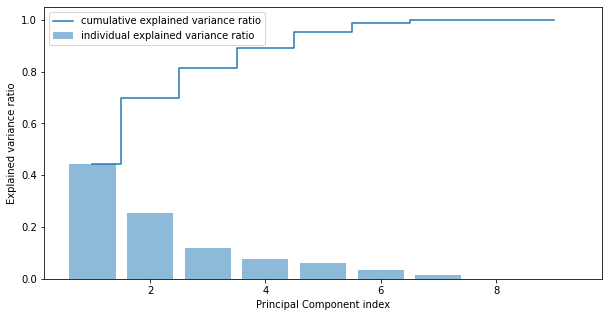

In [41]:
# Plot the explained variances
plt.figure(figsize=(10, 5))
plt.bar(range(1,10), pca.explained_variance_ratio_, alpha=0.5,
    align='center', label='individual explained variance ratio')
plt.step(range(1,10), np.cumsum(pca.explained_variance_ratio_), where='mid',
    label='cumulative explained variance ratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component index')
plt.legend(loc='best')
plt.show()

In [42]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
BasePay,0.457755,0.052033,-0.207696,0.180847,-0.378039,0.148580,0.199946,-1.951090e-01,6.847435e-01
OvertimePay,0.261880,0.031545,0.533849,-0.777880,-0.018038,-0.059757,-0.016506,-5.211119e-02,1.828865e-01
OtherPay,0.240057,0.038827,0.654937,0.555527,0.427401,0.003111,-0.052349,-3.665315e-02,1.286358e-01
Benefits,0.388793,-0.178110,-0.373719,-0.067338,0.366925,-0.484416,-0.498752,-2.296981e-01,4.592626e-02
TotalPay,0.486279,0.057519,0.049175,0.065749,-0.256864,0.113084,0.157654,-4.461666e-01,-6.714142e-01
TotalPayBenefits,0.497490,-0.002415,-0.062600,0.034487,-0.106342,-0.041446,-0.009509,8.402664e-01,-1.680044e-01
Age,-0.083736,0.595915,0.113113,0.095450,-0.388161,0.021118,-0.681802,-6.722053e-17,-2.255141e-17
None,-0.032595,0.605856,-0.047818,0.018148,0.074661,-0.637677,0.465890,9.866240e-17,5.041540e-17
PT,-0.145103,-0.487418,0.286079,0.184663,-0.553104,-0.564004,-0.037461,-1.144917e-16,2.081668e-17


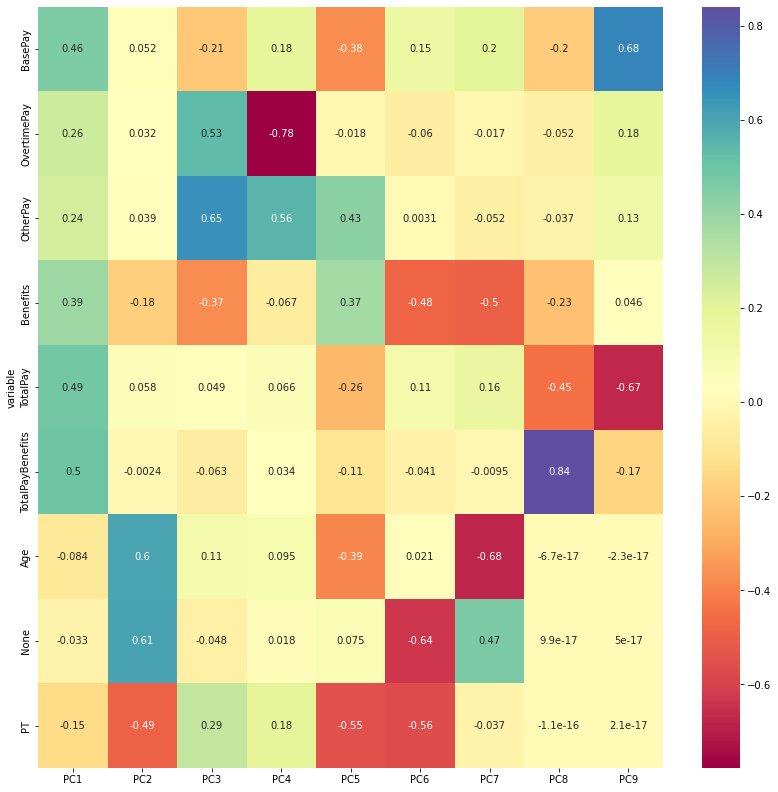

In [43]:
# Plot heatmap
plt.figure(figsize=(14, 14))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [44]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_sc)

In [45]:
pd.DataFrame(df_pca)

,0,1
0,20.768179,4.095061
1,17.929263,3.460250
2,8.166736,2.337311
3,10.952354,2.909306
4,9.911123,2.766072
...,...,...
148646,-2.678738,-0.260859
148647,-3.075087,-3.230449
148648,-3.075087,-3.230449
148649,-3.075087,-3.230449


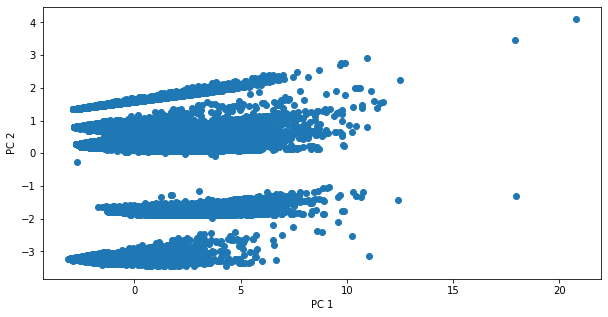

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()